In [2]:
filename = '/home/arowa/work/porichoy/new/TextRecognitionDataGenerator/trdg/out/দেবশিল্পী নামাঙ্কিত ফলিবি_0.jpg'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

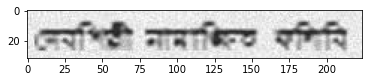

In [4]:
image = cv2.imread(filename)
plt.imshow(image)

Gradient

In [5]:
def gradient(image, threshold1, threshold2, direction):
    if direction == 1:
        mask = np.repeat(np.tile(np.linspace(threshold1, threshold2, image.shape[1]), (image.shape[0], 1))[:, :, np.newaxis], 3, axis=2)
    elif direction == 2:
        mask = np.repeat(np.tile(np.linspace(threshold1, threshold2, image.shape[0]), (image.shape[1], 1)).T[:, :, np.newaxis], 3, axis=2)
    gradient_image = np.uint8(image * mask)
    return gradient_image

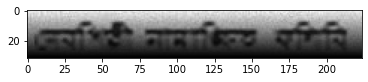

In [6]:
final1 = gradient(image, 1, 0, 2)
plt.imshow(final1)

Resizing

In [7]:
def resize(image, height):
    desired_height_size = height
    width, height = image.shape[1], image.shape[0]
    
    fixed_height = desired_height_size
    height_percent = (fixed_height / float(height))
    width_size = int((float(width) * float(height_percent)))
    image = cv2.resize(image, (width_size, fixed_height),interpolation=cv2.INTER_NEAREST)
    return image


Rotated

In [8]:
def rotate(image, angle):
    image_pil = Image.fromarray(image)
    rotated_image = image_pil.rotate(angle, expand = 0)
    return rotated_image

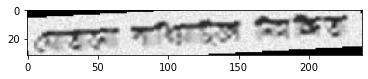

In [15]:
rotated_img = rotate(image, 3)
plt.imshow(rotated_img)

In [10]:
import os
import random as rnd

In [11]:
directory = '/home/arowa/work/porichoy/new/TextRecognitionDataGenerator/trdg/out/normal_images'

In [13]:
for image_name in os.listdir(directory):
    image = cv2.imread(directory+'/'+image_name)
    direction = rnd.randint(1, 2)
    threshold1 = rnd.uniform(0,1)
    threshold2 = rnd.uniform(0,1)
    gradient_image = gradient(image, threshold1, threshold2, direction)
    gradient_image_pil = Image.fromarray(gradient_image)
    gradient_image_pil.save('/home/arowa/work/porichoy/new/TextRecognitionDataGenerator/trdg/out/'+image_name)